# Image Conversion

This notebook is for an image conversion with first_combined.csv data which is a data after preprocessing.
We will converse data into image with Gramian Angular Algorithm.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import datetime
import numpy as np

In [2]:
from pyts.datasets import load_gunpoint
from pyts.image import GramianAngularField

In [3]:
from multiprocessing import Pool, cpu_count
import os

In [4]:
import torch
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.tabular import *
import pandas as pd

In [5]:
pd.set_option('display.max_rows', 10000)

### 1. Load data

In [6]:
data = pd.read_csv('../data/processed data/first_combined.csv')
data.head()

close        date    minute
0  8391.10  2017-01-02  09:15:00
1  8391.15  2017-01-02  09:16:00
2  8373.60  2017-01-02  09:17:00
3  8376.75  2017-01-02  09:18:00
4  8373.70  2017-01-02  09:19:00

- Dataframe to work with for Gramian Field Algorithm

In [7]:
temp = data.groupby('date', as_index=True)['close'].apply(list).to_frame()
date_feat_df = pd.DataFrame(temp['close'].to_list(), index=temp.index)
date_feat_df.sample(10)

0         1         2         3         4         5   \
date                                                                     
2017-08-04  10348.60  10353.75  10348.00  10347.40  10340.05  10332.45   
2020-11-04  11952.60  11942.25  11960.05  11966.45  11965.45  11963.40   
2020-09-14  11673.55  11675.25  11672.10  11672.60  11667.55  11673.85   
2017-09-13  10490.20  10481.25  10488.55  10487.75  10491.70  10485.60   
2020-09-16  11669.35  11670.90  11673.10  11677.35  11678.05  11674.15   
2019-10-22  11798.35  11817.55  11833.25  11836.80  11829.00  11826.70   
2017-04-24   9482.55   9480.65   9481.20   9490.60   9493.70   9495.10   
2018-01-18  11314.90  11298.95  11297.20  11305.45  11298.45  11299.95   
2017-11-13  10729.15  10731.45  10739.05  10732.15  10729.25  10729.85   
2017-11-07  10905.75  10911.80  10907.15  10912.90  10906.35  10904.50   

                  6         7         8         9   ...        50        51  \
date                                                ...                       
2017-08-04  10334.85  10338.15  10341.50  10344.05  ...  10367.05  10361.65   
2020-11-04  11956.40  11953.20  11954.55  11962.10  ...  11973.70  11970.75   
2020-09-14  11677.20  11676.15  11679.85  11682.90  ...  11656.70  11656.35   
2017-09-13  10486.80  10485.50  10493.40  10495.50  ...  10518.95  10517.05   
2020-09-16  11681.05  11673.70  11671.65  11673.70  ...  11682.00  11681.90   
2019-10-22  11833.60  11834.10  11836.25  11844.60  ...  11810.15  11814.05   
2017-04-24   9493.55   9494.55   9493.70   9490.10  ...   9501.10   9500.85   
2018-01-18  11292.65  11294.35  11294.00  11297.10  ...  11300.65  11301.40   
2017-11-13  10729.75  10724.45  10716.80  10717.40  ...  10691.45  10694.50   
2017-11-07  10899.75  10905.50  10904.35  10905.40  ...  10864.90  10872.90   

                  52        53        54        55        56        57  \
date                                                                     
2017-08-04  10362.60  10359.85  10355.50  10352.30  10352.70  10355.95   
2020-11-04  11969.85  11965.30  11970.50  11978.10  11972.10  11969.35   
2020-09-14  11655.65  11655.95  11657.25  11656.45  11655.20  11655.95   
2017-09-13  10517.35  10514.65  10514.10  10510.55  10507.00  10508.85   
2020-09-16  11679.60  11674.30  11681.45  11675.95  11677.30  11677.15   
2019-10-22  11815.05  11822.00  11816.70  11818.60  11822.55  11823.65   
2017-04-24   9499.60   9499.25   9500.30   9503.45   9504.60   9505.55   
2018-01-18  11303.30  11306.65  11303.25  11300.70  11300.85  11299.95   
2017-11-13  10692.70  10693.90  10690.05  10687.60  10688.50  10686.10   
2017-11-07  10870.15  10872.50  10867.70  10869.80  10864.50  10858.50   

                  58        59  
date                            
2017-08-04  10351.85  10351.35  
2020-11-04  11974.35  11961.30  
2020-09-14  11652.95  11650.40  
2017-09-13  10510.50  10511.55  
2020-09-16  11676.30  11681.10  
2019-10-22  11819.10  11819.25  
2017-04-24   9503.90   9502.90  
2018-01-18  11301.10  11303.00  
2017-11-13  10681.85  10683.35  
2017-11-07  10854.15  10853.25  

[10 rows x 60 columns]

In [8]:
gramian_df = date_feat_df.copy()
gramian_df.to_csv('../data/processed data/gramian_df.csv', index=True)
gramian_df.head()

0        1        2        3        4        5        6   \
date                                                                        
2017-01-02  8391.10  8391.15  8373.60  8376.75  8373.70  8365.60  8371.20   
2017-01-03  8385.10  8382.75  8380.30  8380.65  8377.20  8371.30  8377.50   
2017-01-04  8423.35  8430.15  8429.45  8425.35  8429.10  8431.70  8434.05   
2017-01-05  8450.80  8452.90  8445.95  8451.20  8451.95  8459.20  8461.30   
2017-01-06  8522.20  8525.25  8519.60  8521.60  8520.40  8522.05  8521.20   

                 7        8        9   ...       50       51       52  \
date                                   ...                              
2017-01-02  8368.10  8368.85  8369.85  ...  8363.85  8361.05  8361.25   
2017-01-03  8379.45  8379.95  8372.95  ...  8389.05  8389.90  8389.45   
2017-01-04  8424.95  8425.95  8422.35  ...  8437.25  8435.65  8432.40   
2017-01-05  8460.75  8459.85  8460.00  ...  8464.90  8462.50  8460.65   
2017-01-06  8532.65  8531.20  8531.35  ...  8535.35  8535.60  8536.55   

                 53       54       55       56       57       58       59  
date                                                                       
2017-01-02  8361.75  8360.65  8358.25  8357.20  8357.05  8358.05  8358.15  
2017-01-03  8393.35  8394.15  8395.30  8391.55  8393.45  8396.20  8403.10  
2017-01-04  8429.95  8428.55  8433.95  8435.35  8434.85  8437.75  8438.85  
2017-01-05  8461.50  8462.70  8462.40  8461.25  8460.15  8458.25  8462.55  
2017-01-06  8536.80  8534.65  8532.35  8529.35  8525.90  8527.80  8525.90  

[5 rows x 60 columns]

In [9]:
def convert_img(img_path, idx, curr_X_gadf, gramian_df):
    
    fig = plt.figure()
    ax = plt.subplot(111)

    date_str = str(gramian_df.index[idx])
    fname = f'{img_path}/{date_str}.png'

    ax.imshow(curr_X_gadf, cmap='rainbow', origin='lower')
    ax.set_title('')
    ax.set_xticks([])
    ax.set_yticks([])

    fig.savefig(fname, bbox_inches='tight')

In [10]:
def gramian_img(img_path, gramian_df):
    
    # scale inputs to [-1,1]
    scaler = MinMaxScaler(feature_range=(-1,1))
    # did not flatten the images
    gadf = GramianAngularField(sample_range=(-1,1), method='difference') #
    
    for idx in range(gramian_df.shape[0]):
        curr_row = np.array(gramian_df.iloc[idx].dropna()).reshape(-1, 1)
        model = scaler.fit(curr_row)
        curr_feat = model.transform(curr_row).T

        # gramian
        curr_X_gadf = gadf.fit_transform(curr_feat)
        # convert image
        convert_img(img_path, idx, curr_X_gadf[0], gramian_df)

C:\Users\sohyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


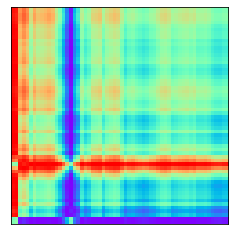

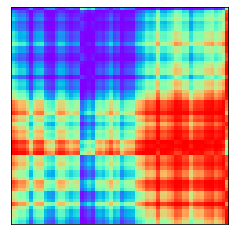

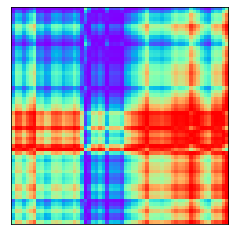

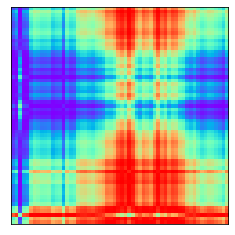

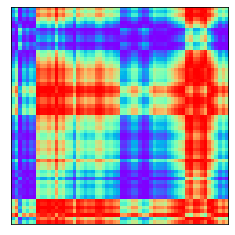

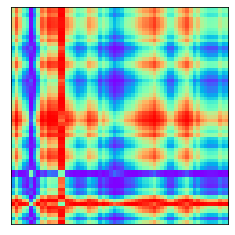

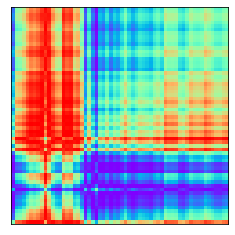

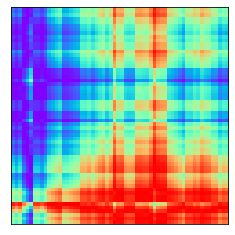

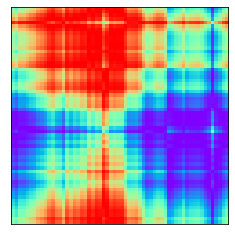

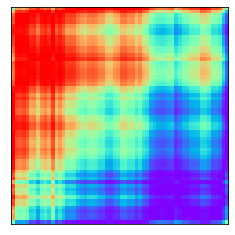

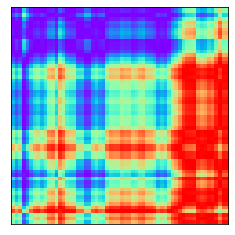

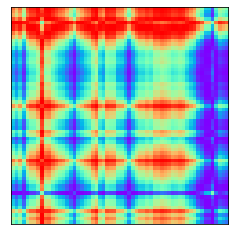

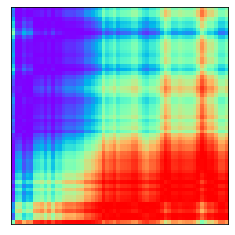

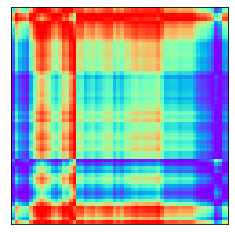

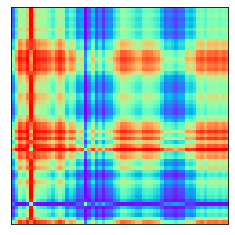

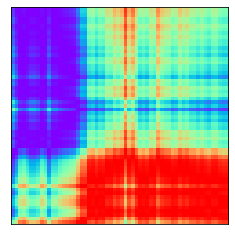

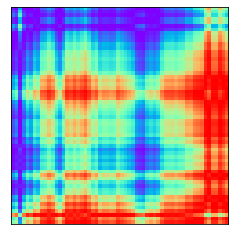

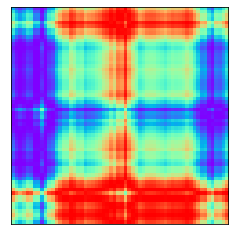

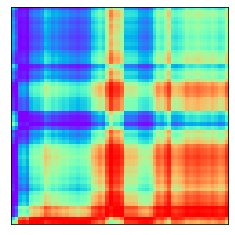

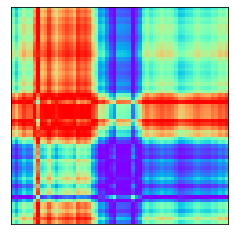

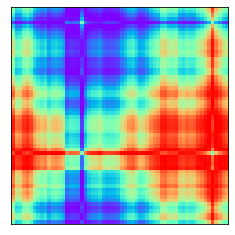

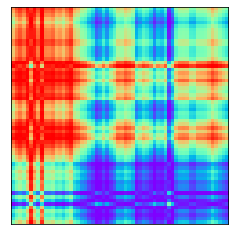

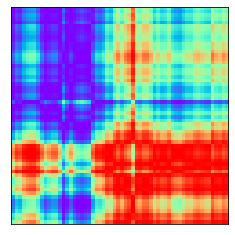

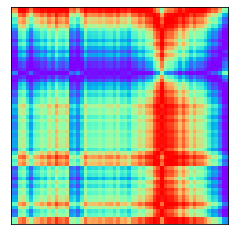

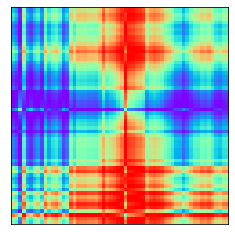

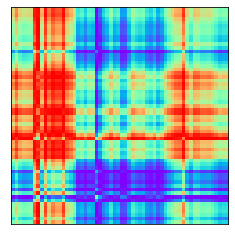

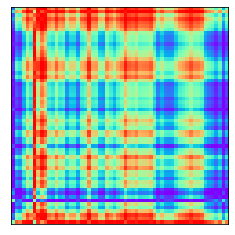

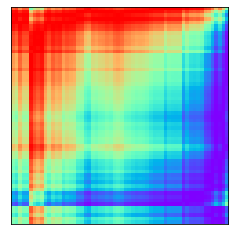

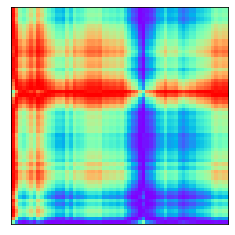

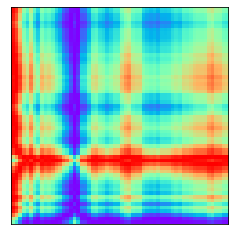

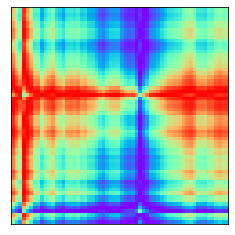

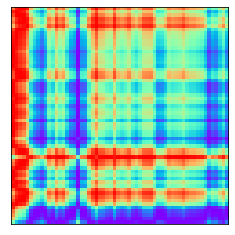

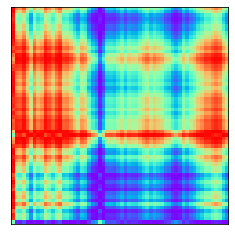

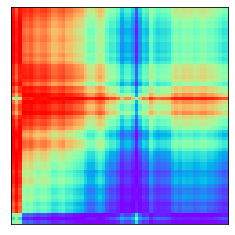

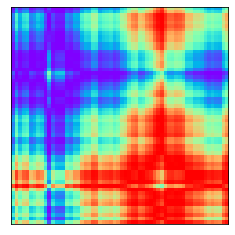

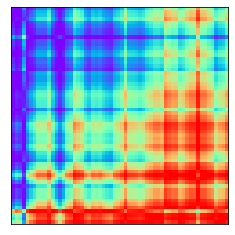

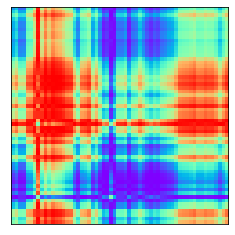

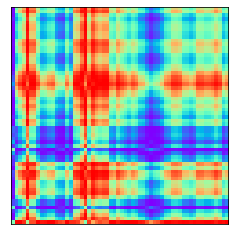

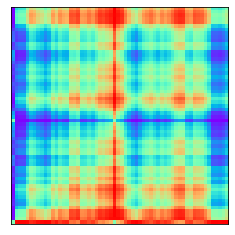

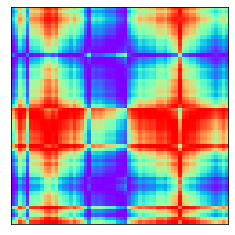

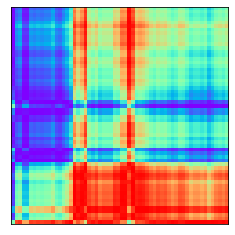

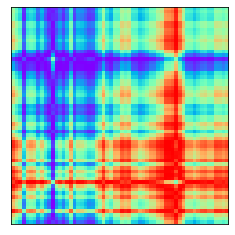

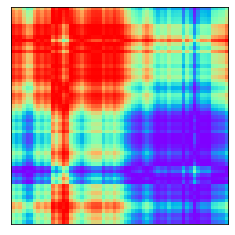

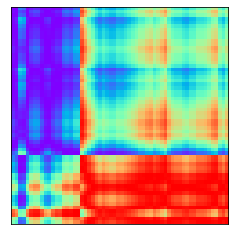

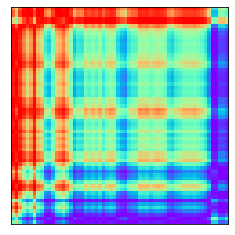

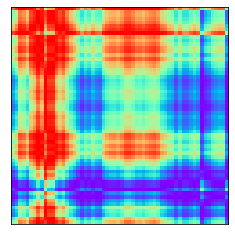

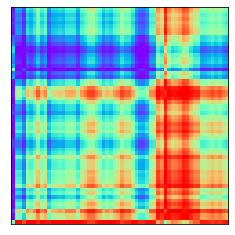

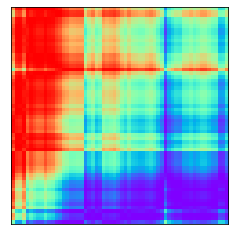

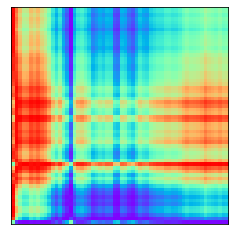

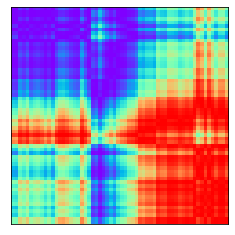

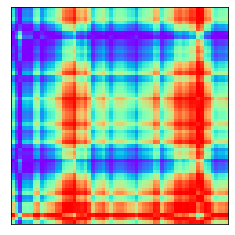

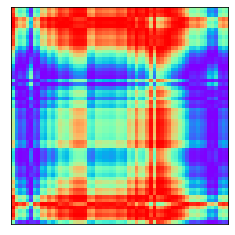

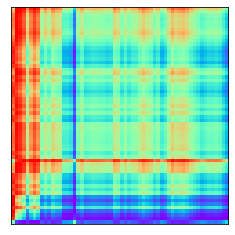

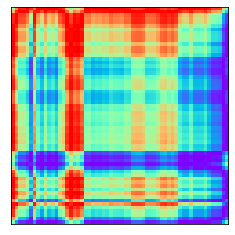

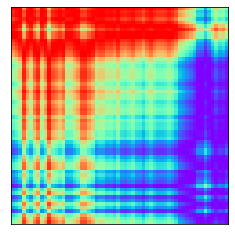

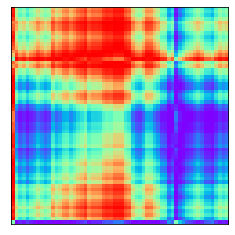

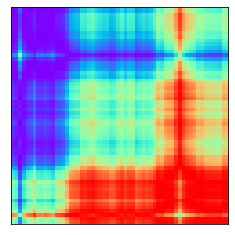

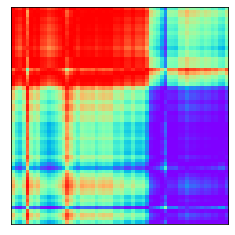

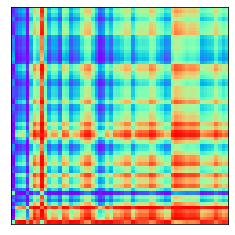

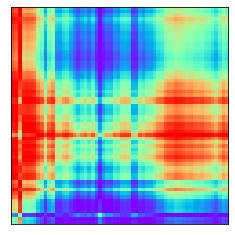

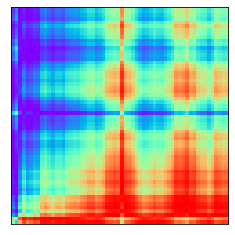

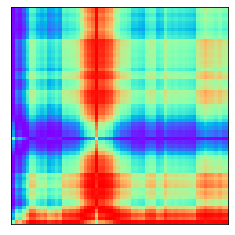

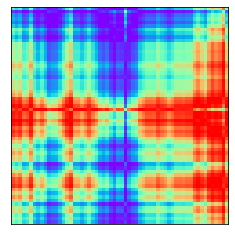

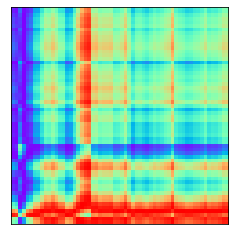

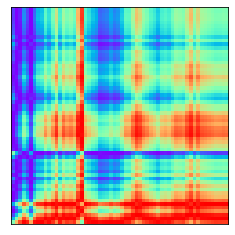

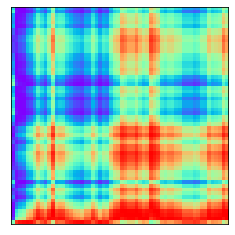

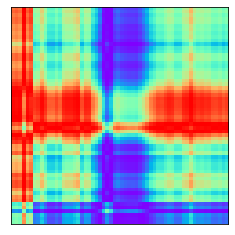

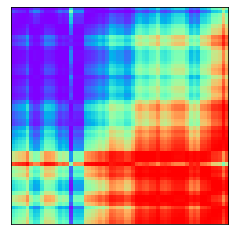

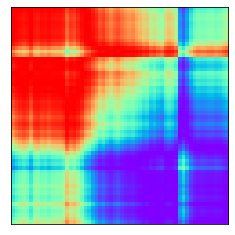

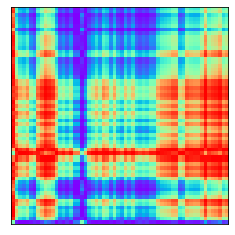

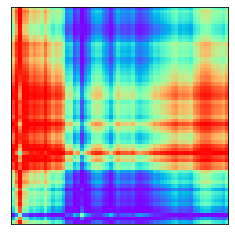

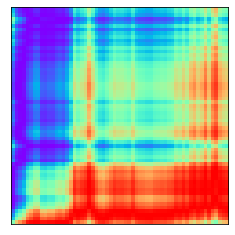

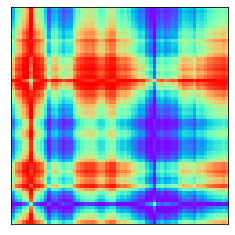

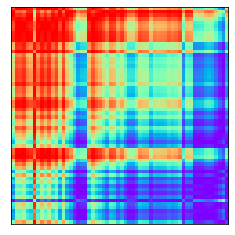

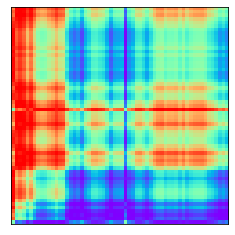

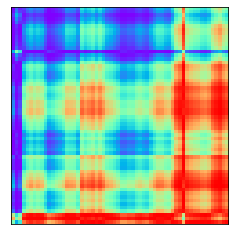

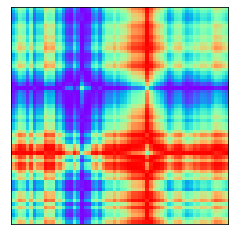

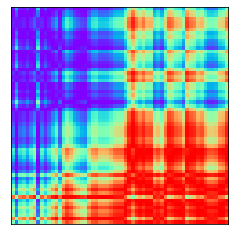

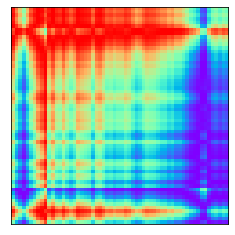

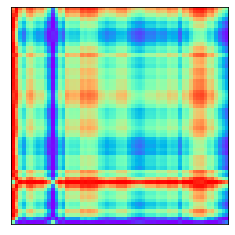

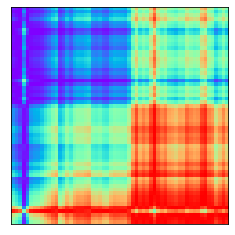

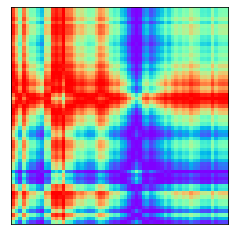

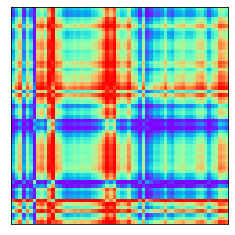

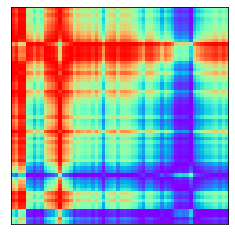

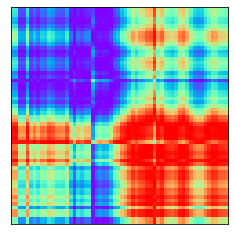

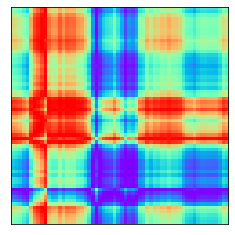

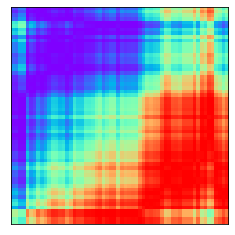

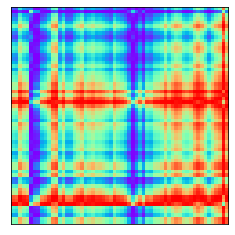

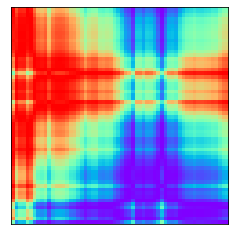

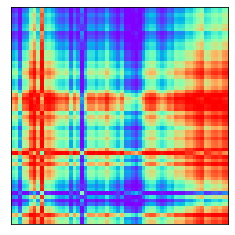

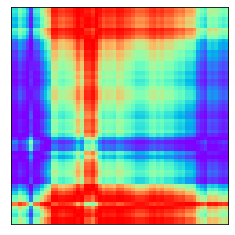

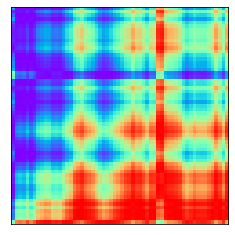

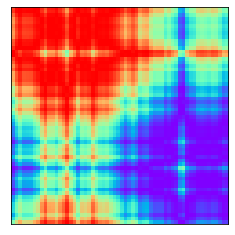

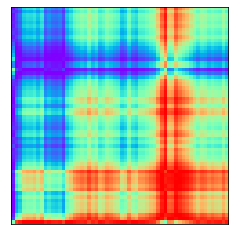

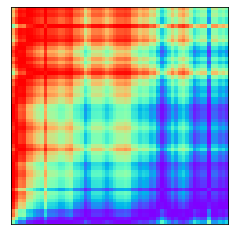

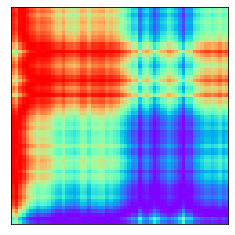

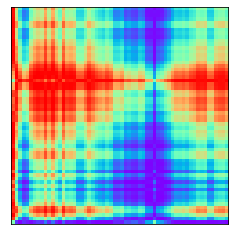

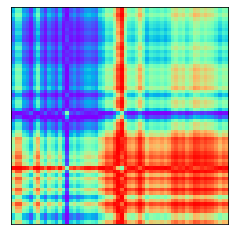

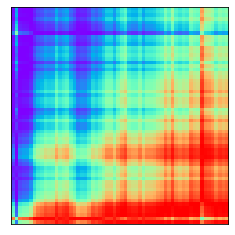

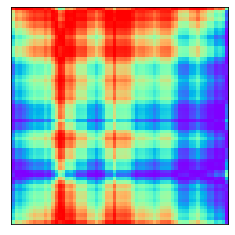

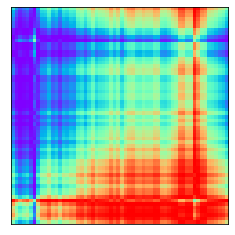

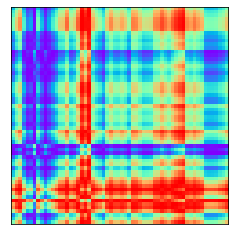

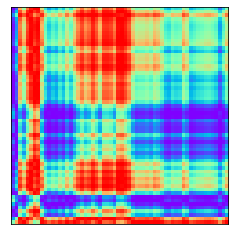

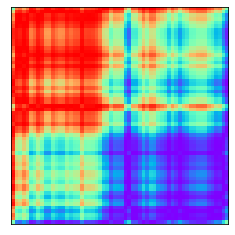

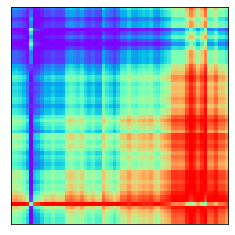

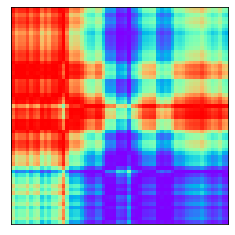

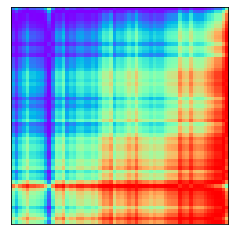

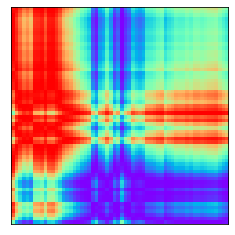

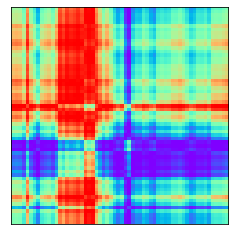

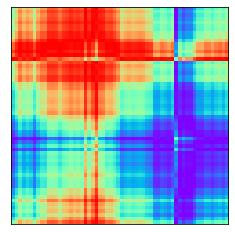

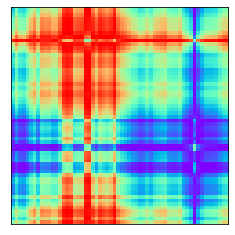

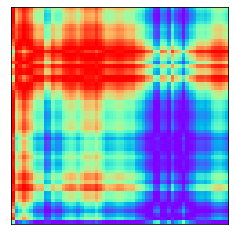

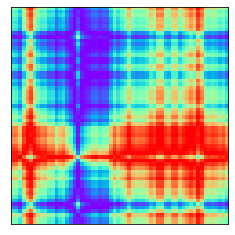

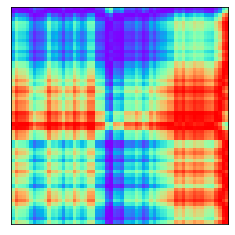

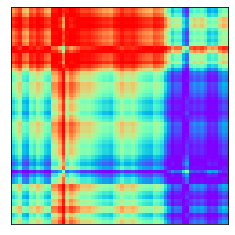

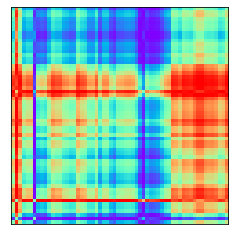

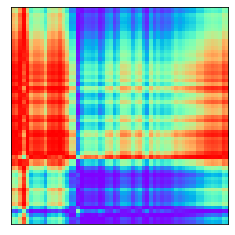

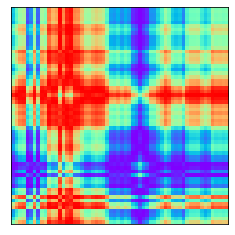

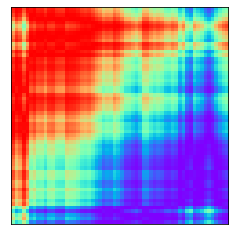

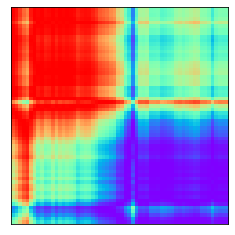

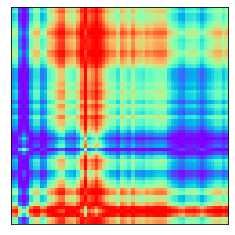

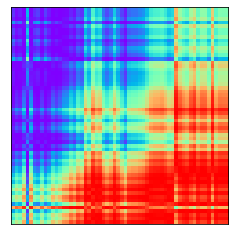

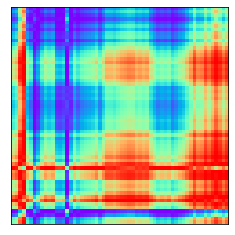

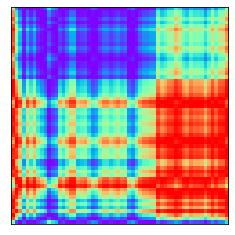

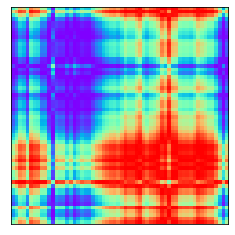

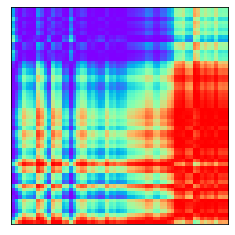

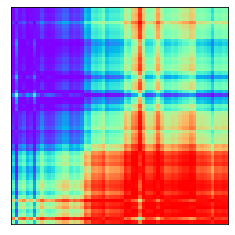

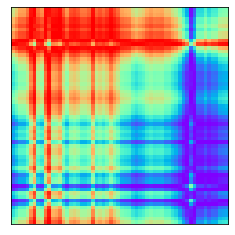

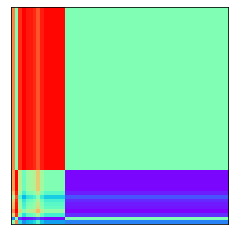

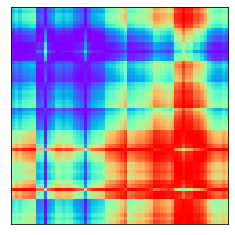

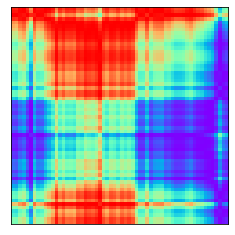

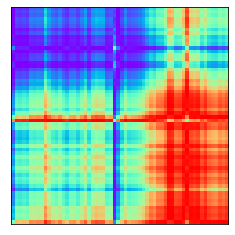

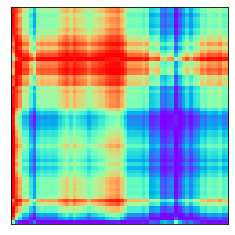

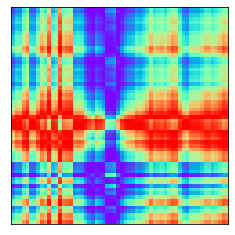

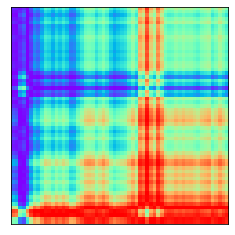

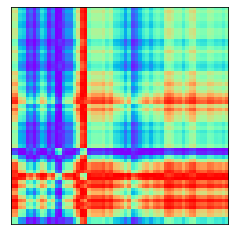

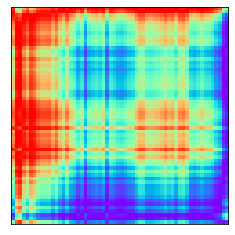

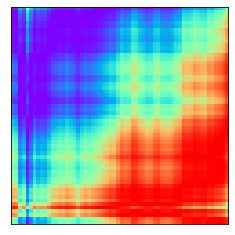

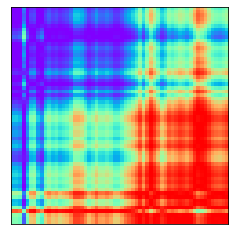

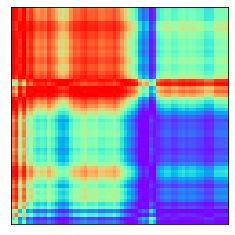

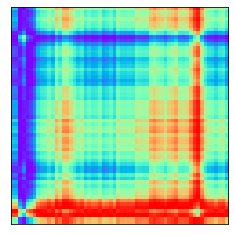

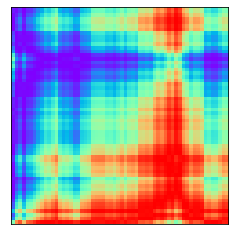

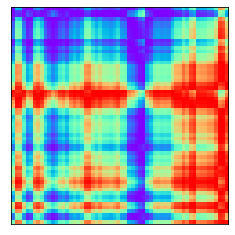

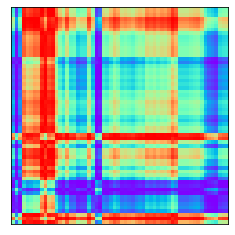

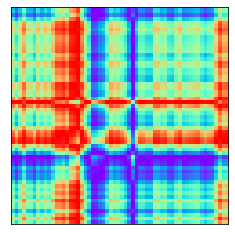

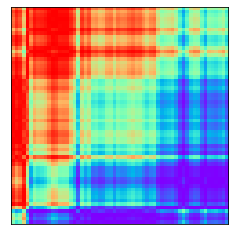

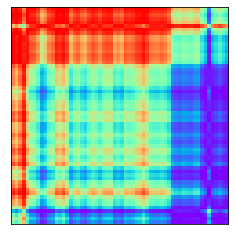

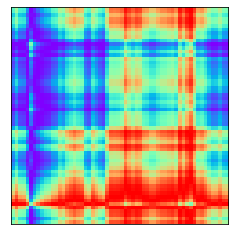

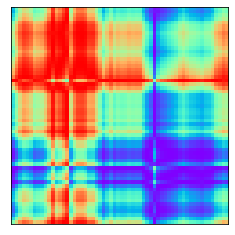

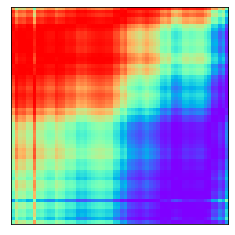

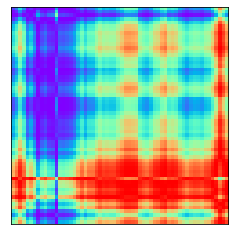

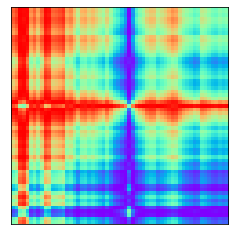

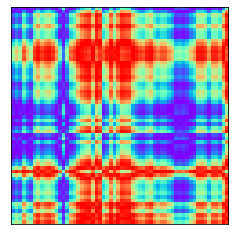

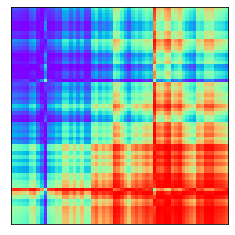

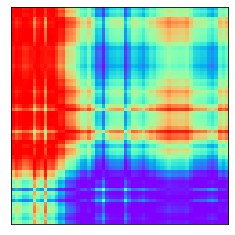

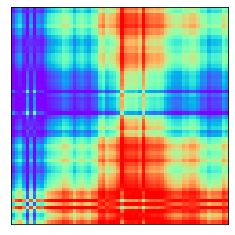

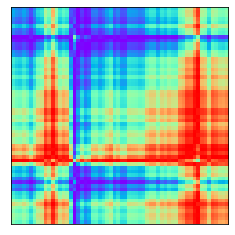

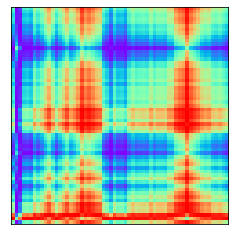

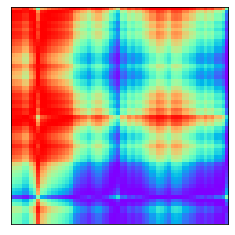

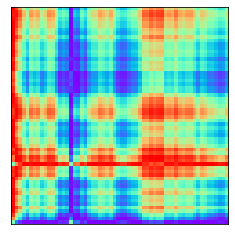

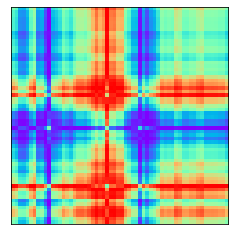

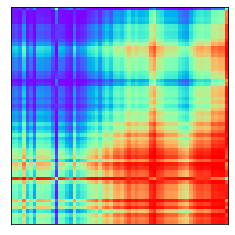

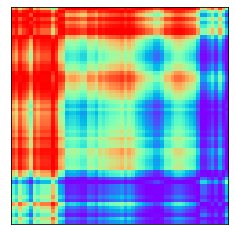

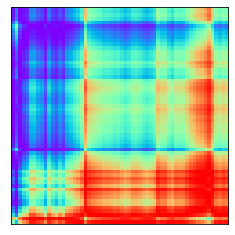

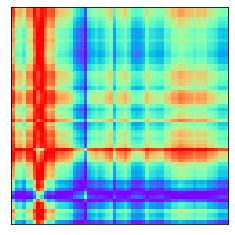

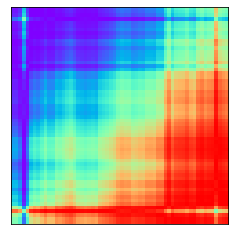

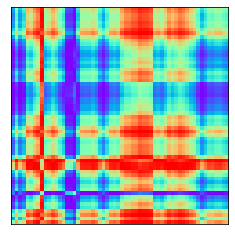

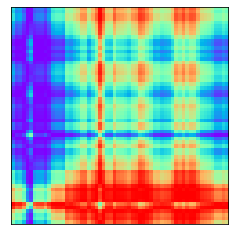

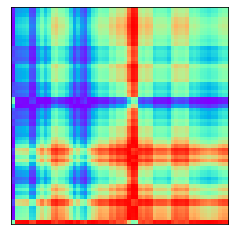

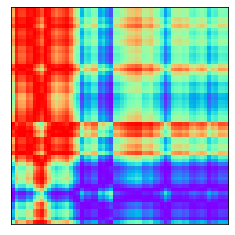

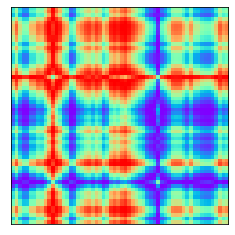

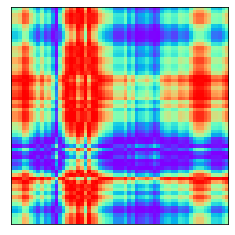

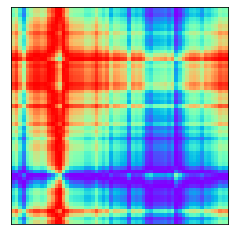

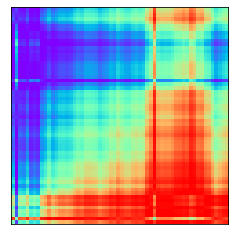

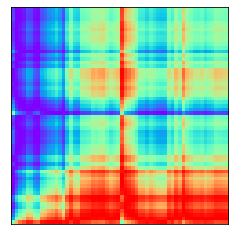

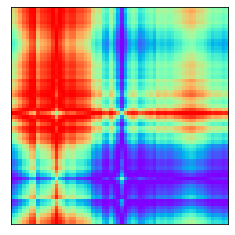

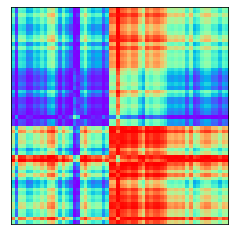

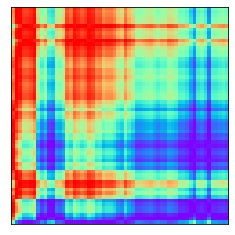

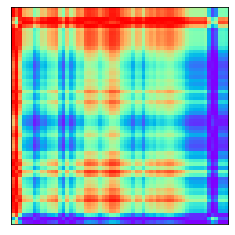

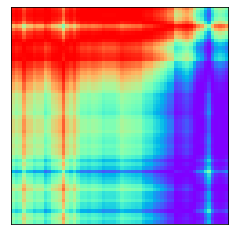

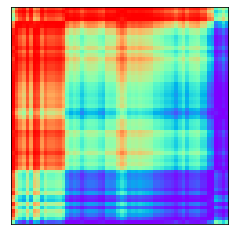

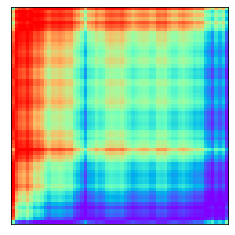

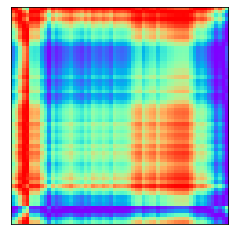

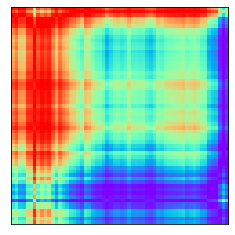

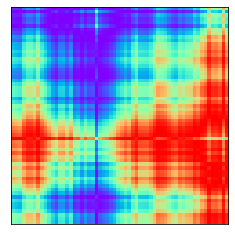

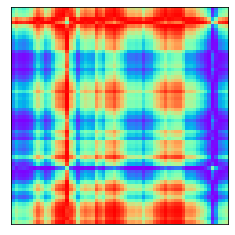

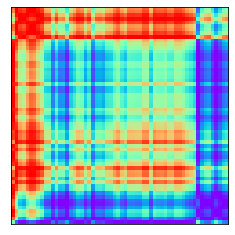

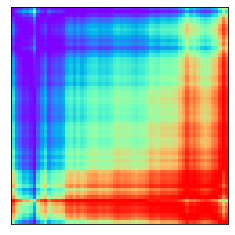

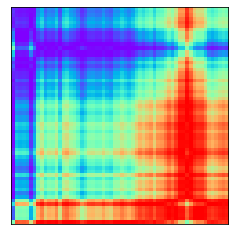

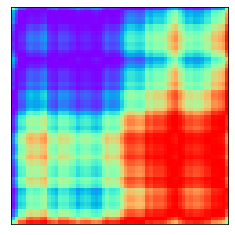

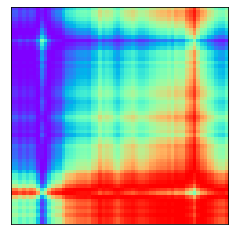

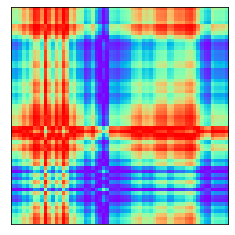

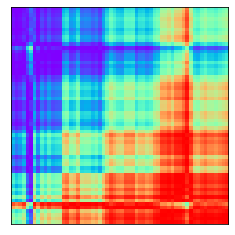

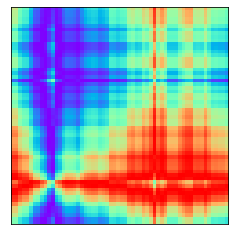

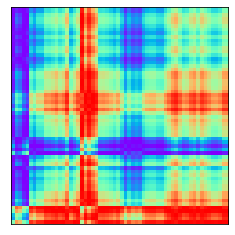

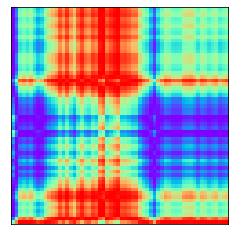

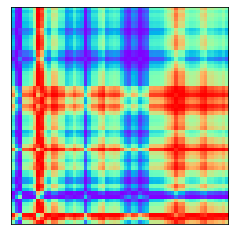

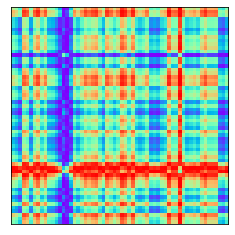

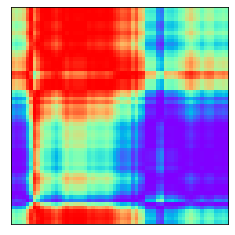

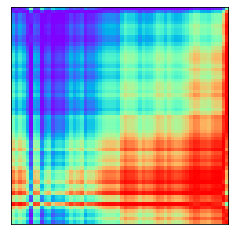

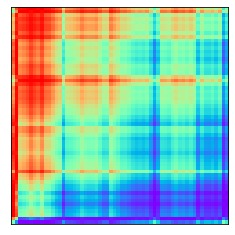

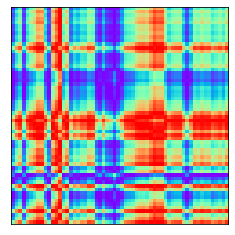

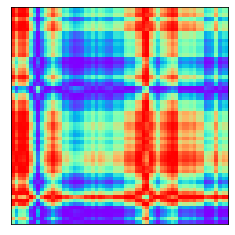

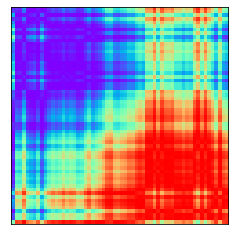

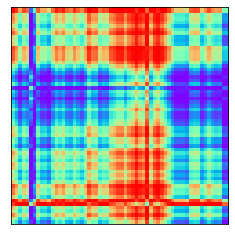

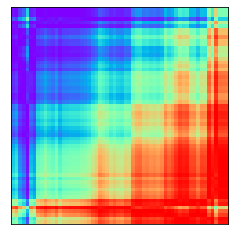

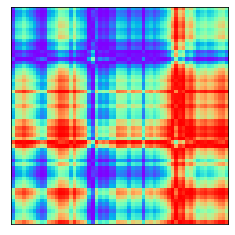

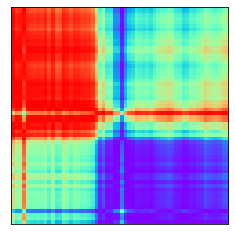

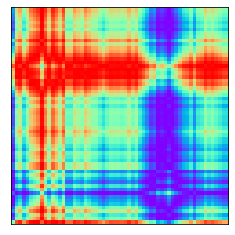

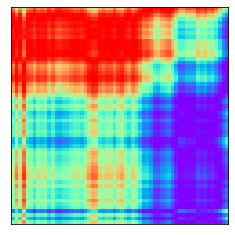

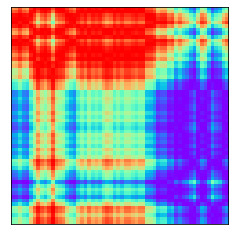

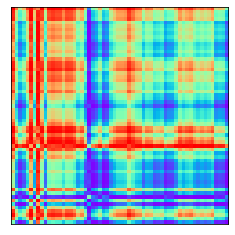

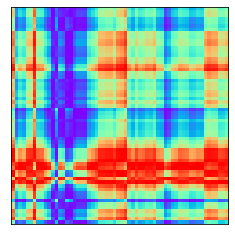

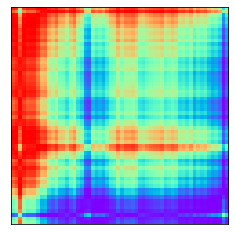

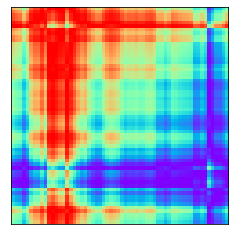

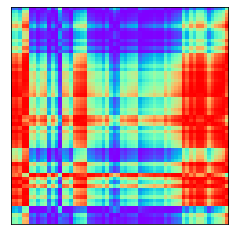

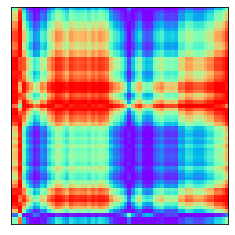

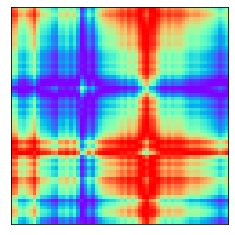

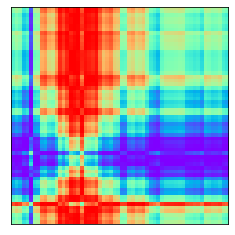

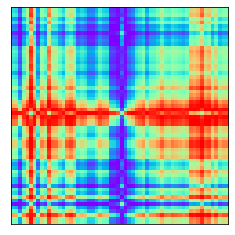

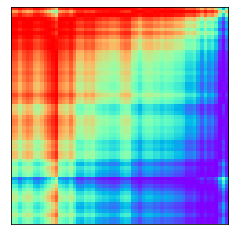

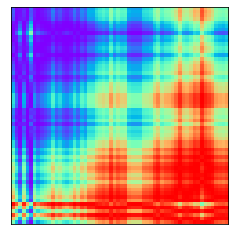

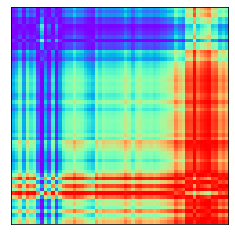

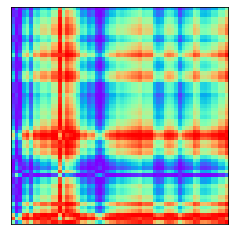

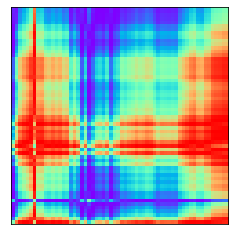

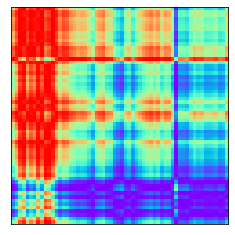

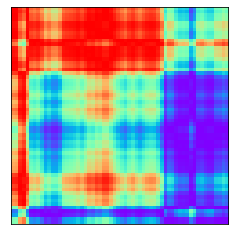

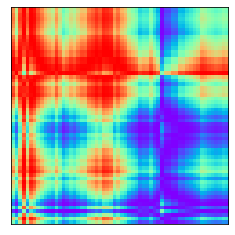

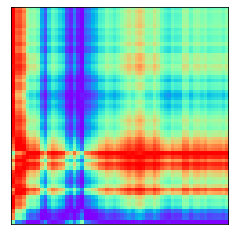

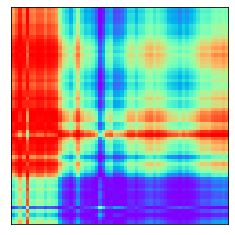

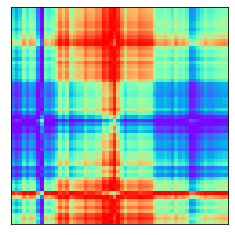

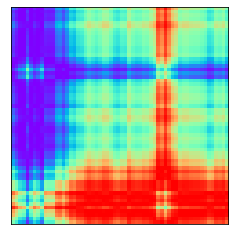

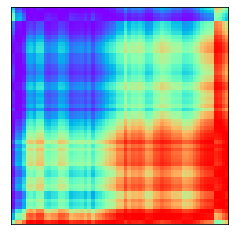

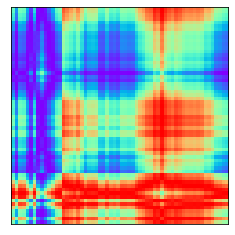

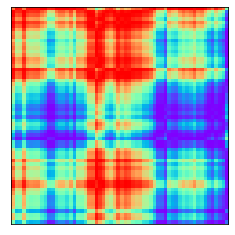

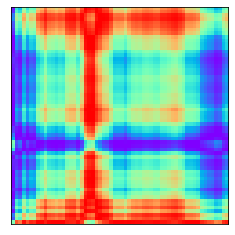

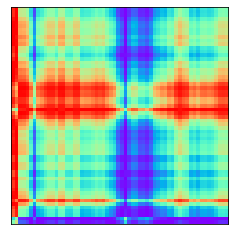

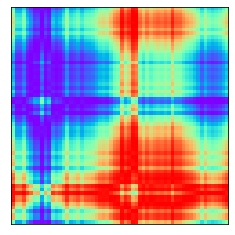

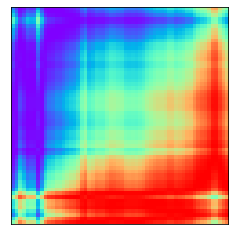

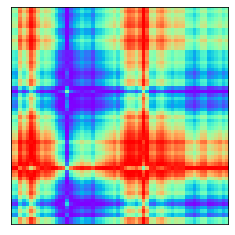

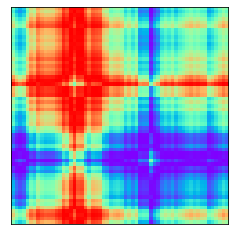

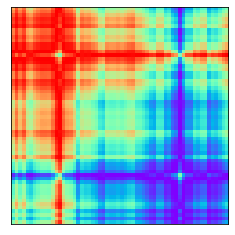

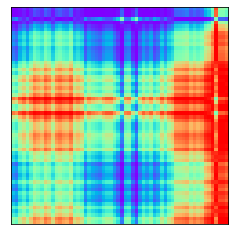

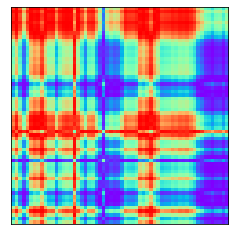

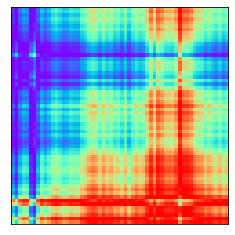

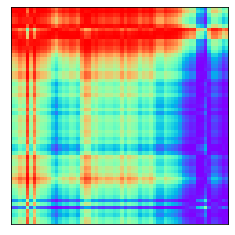

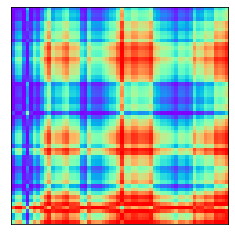

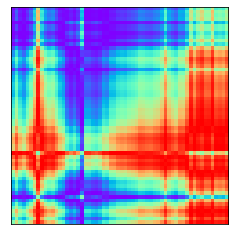

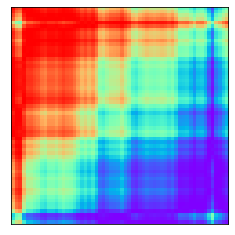

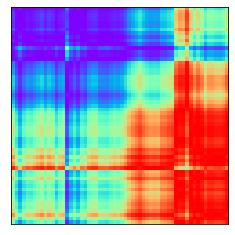

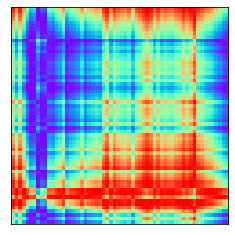

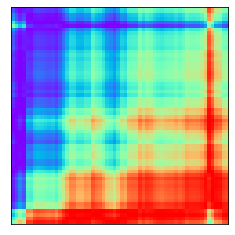

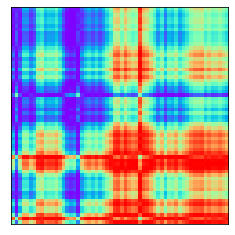

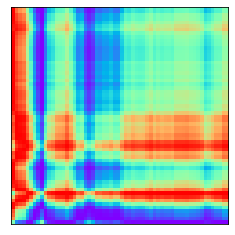

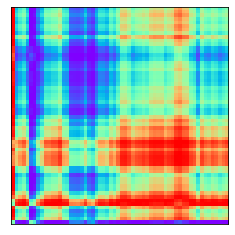

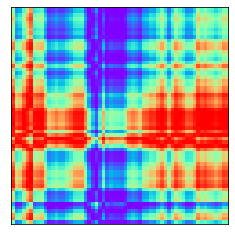

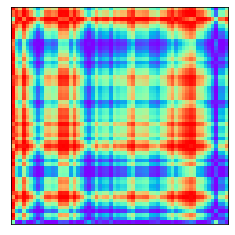

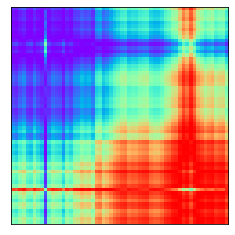

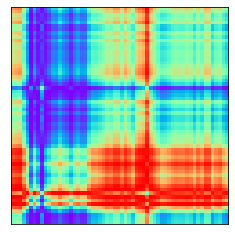

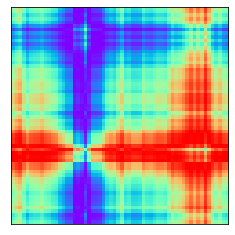

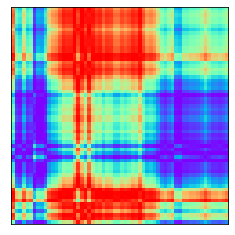

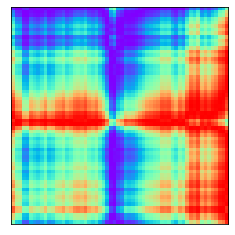

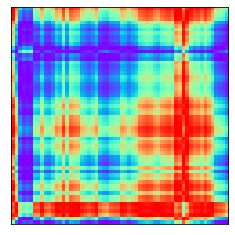

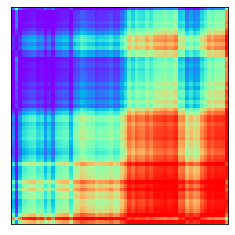

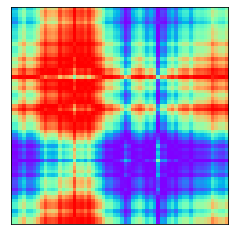

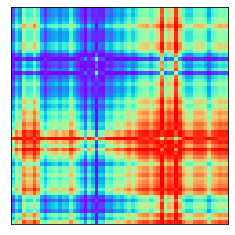

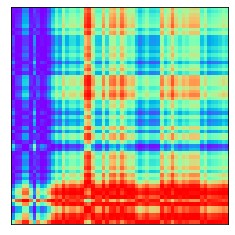

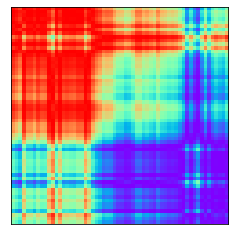

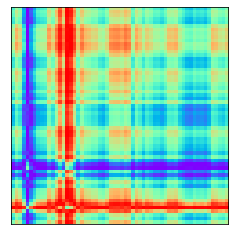

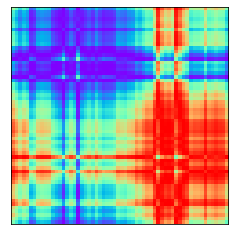

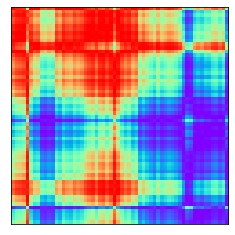

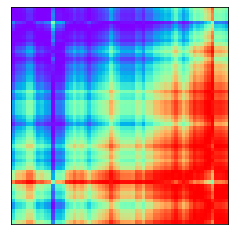

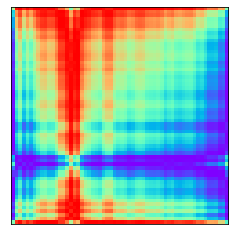

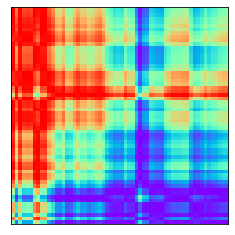

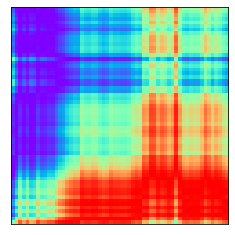

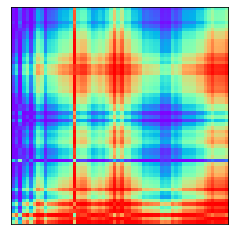

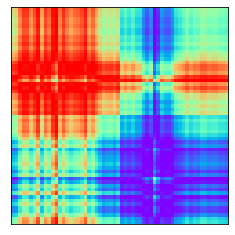

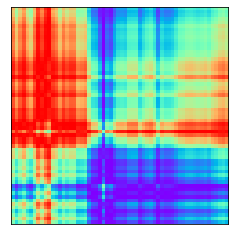

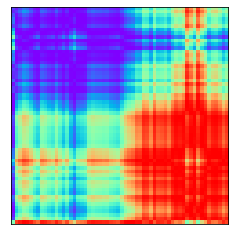

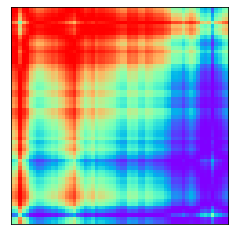

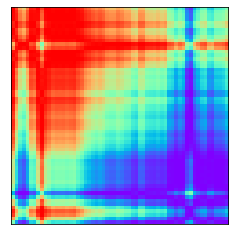

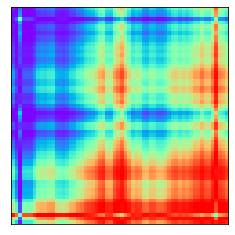

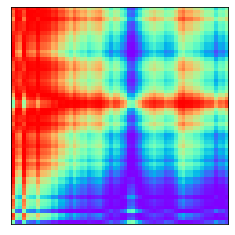

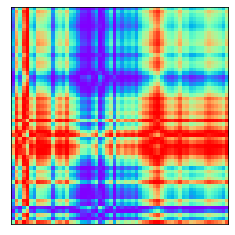

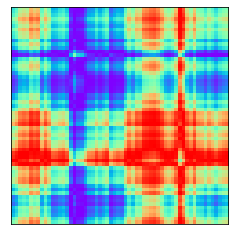

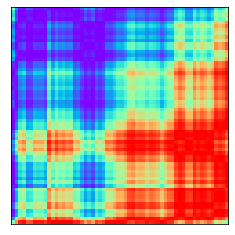

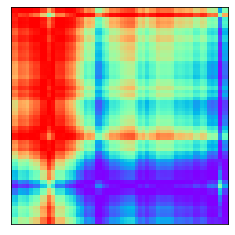

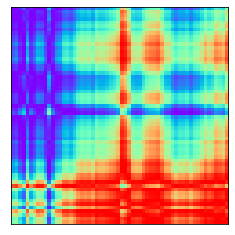

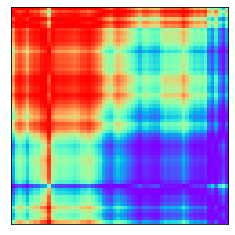

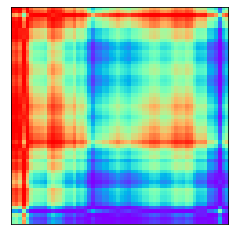

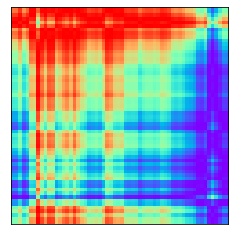

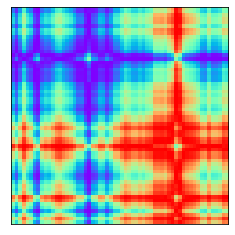

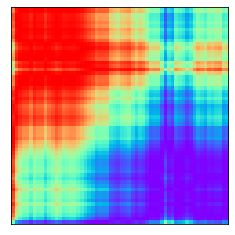

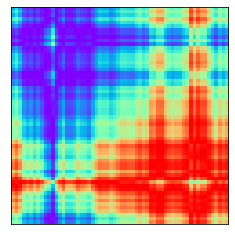

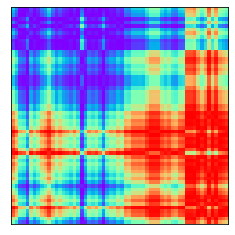

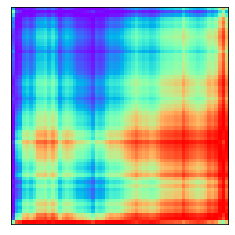

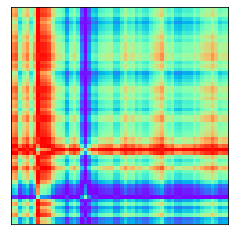

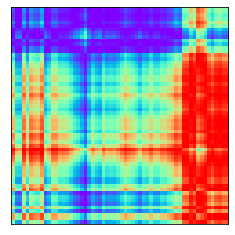

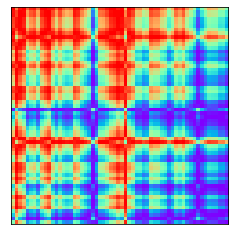

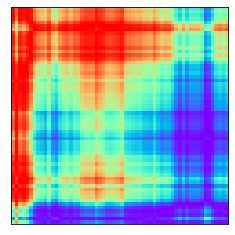

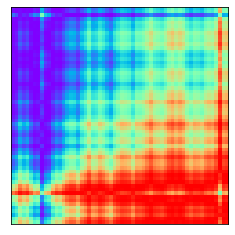

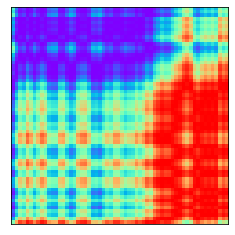

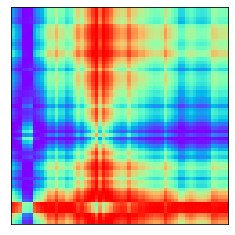

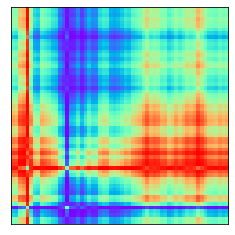

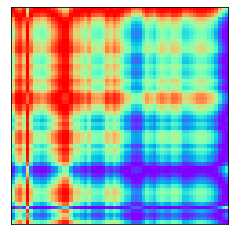

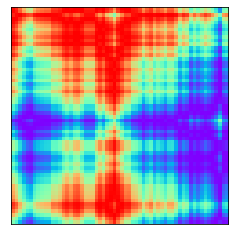

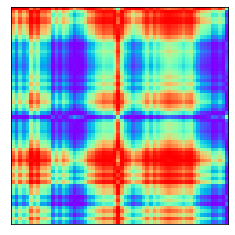

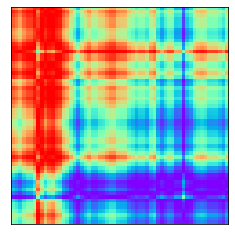

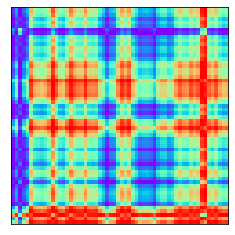

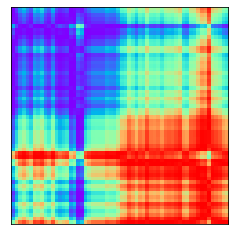

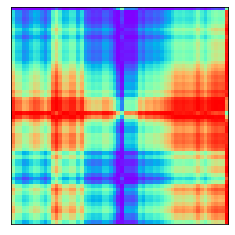

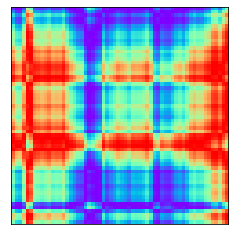

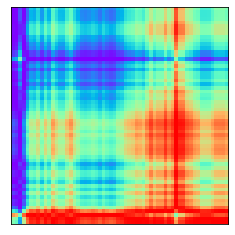

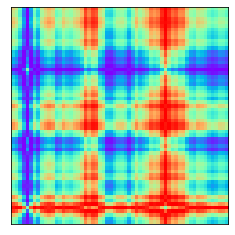

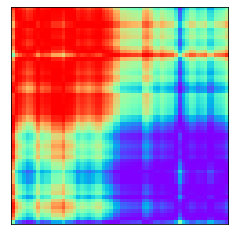

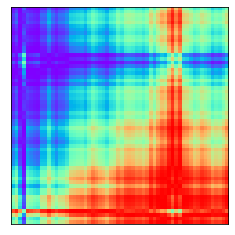

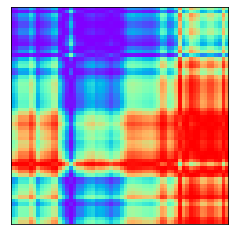

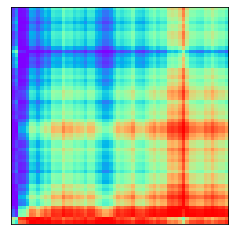

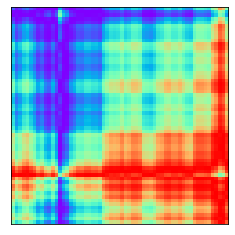

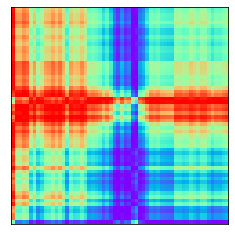

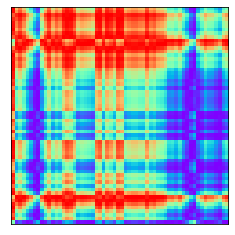

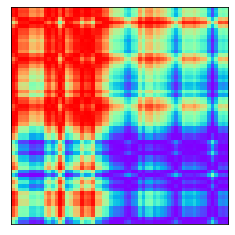

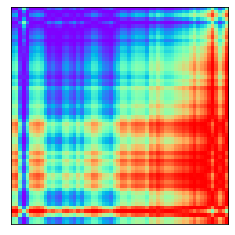

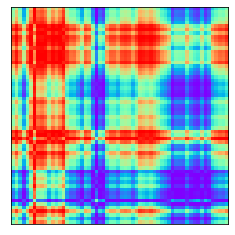

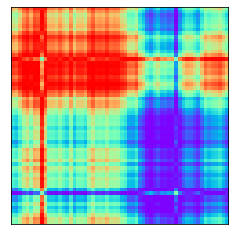

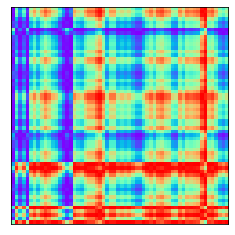

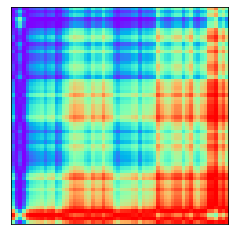

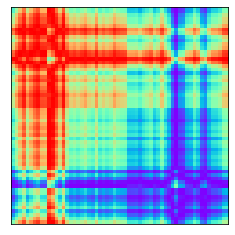

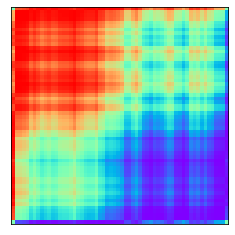

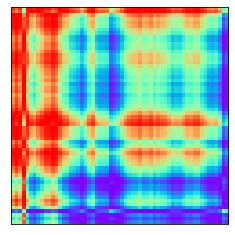

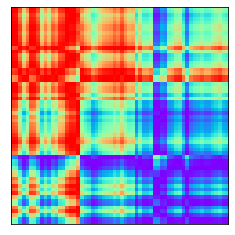

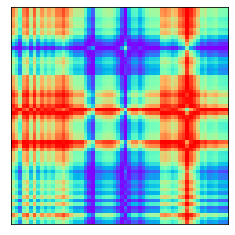

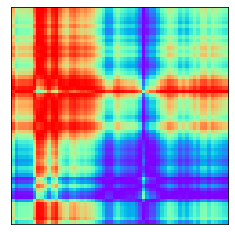

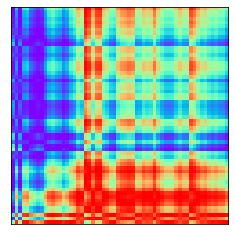

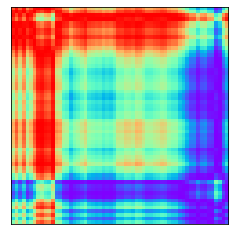

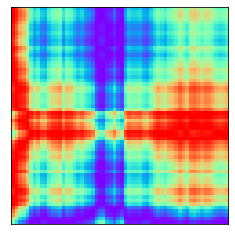

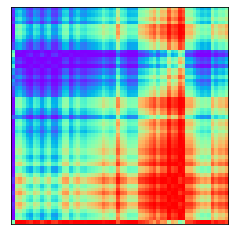

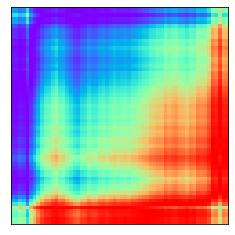

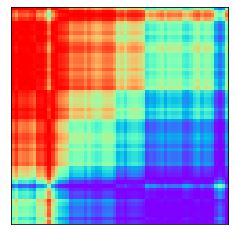

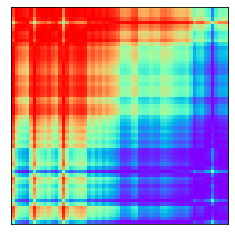

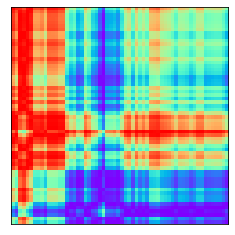

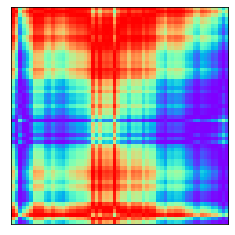

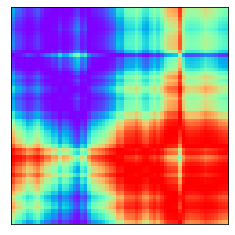

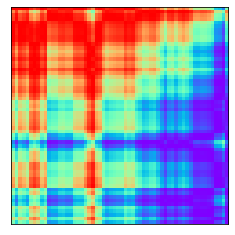

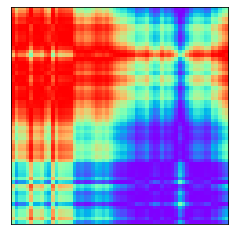

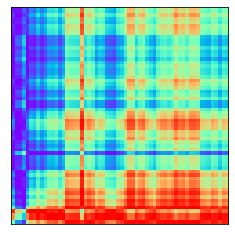

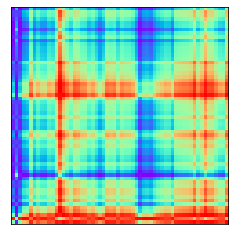

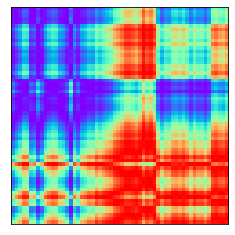

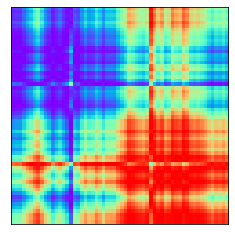

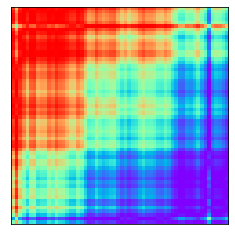

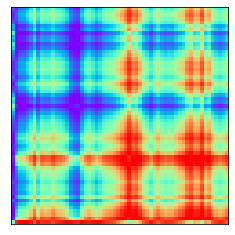

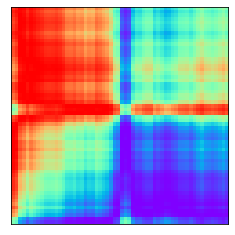

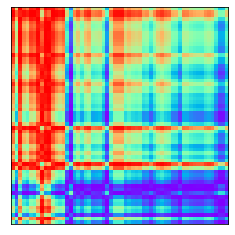

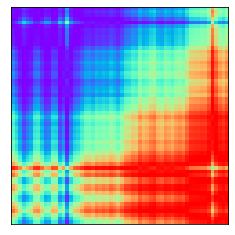

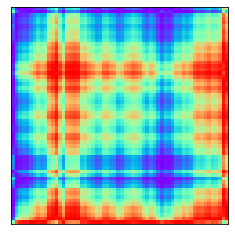

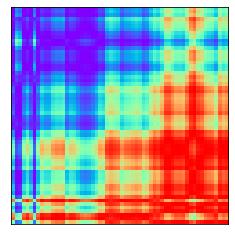

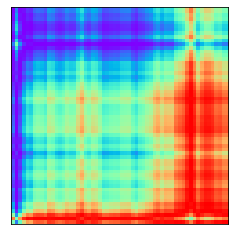

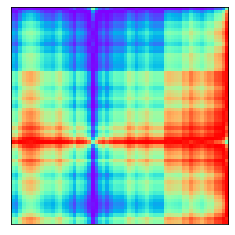

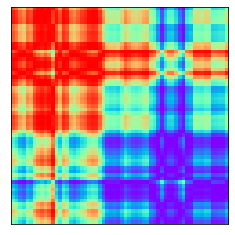

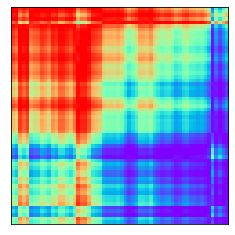

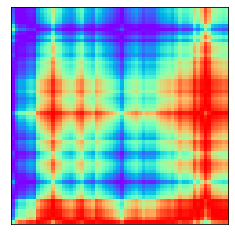

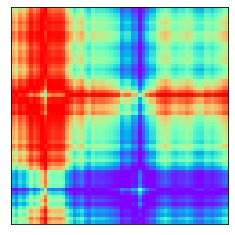

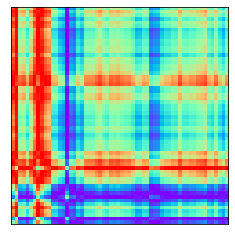

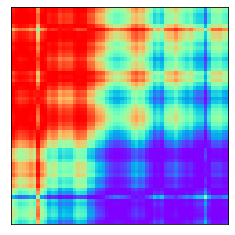

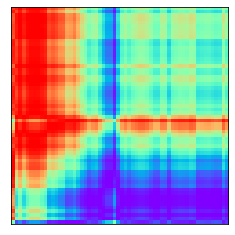

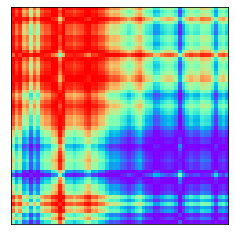

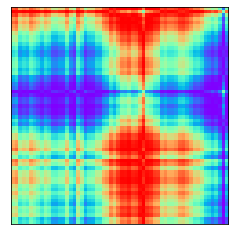

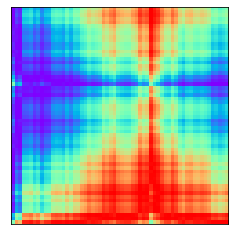

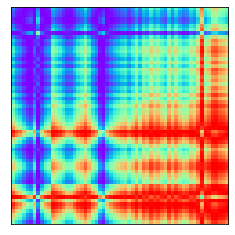

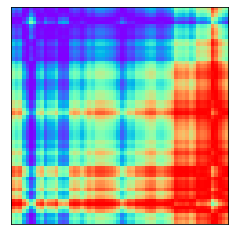

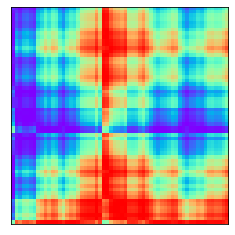

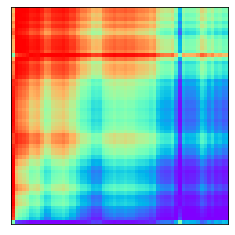

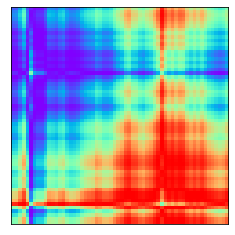

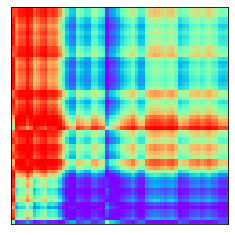

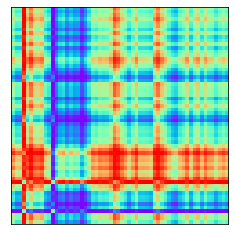

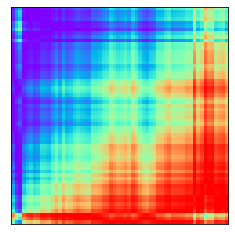

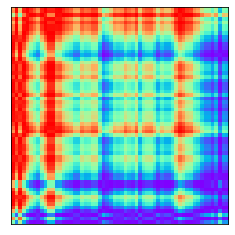

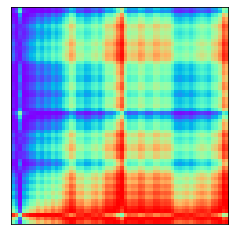

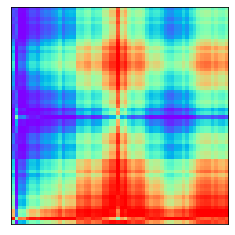

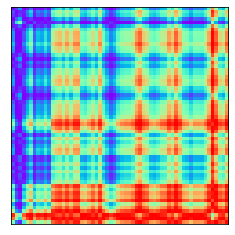

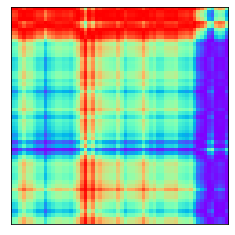

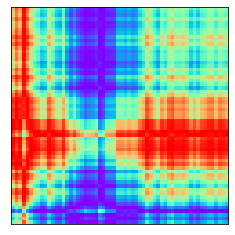

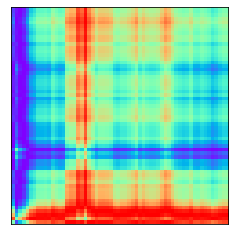

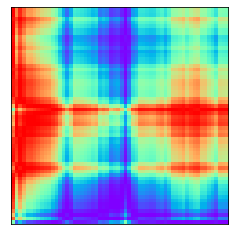

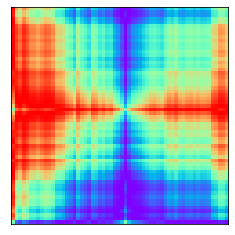

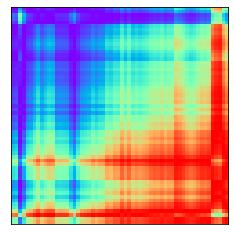

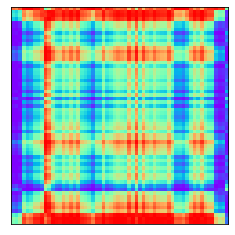

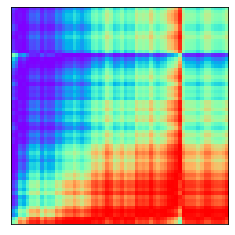

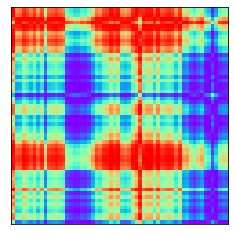

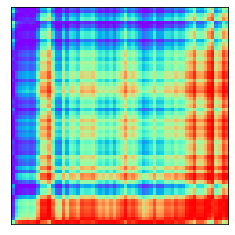

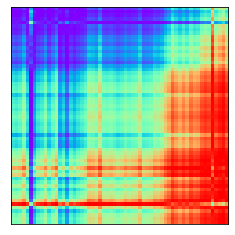

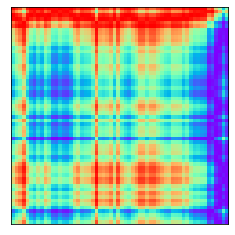

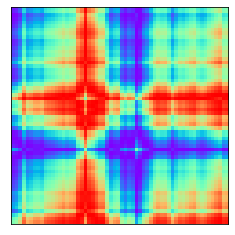

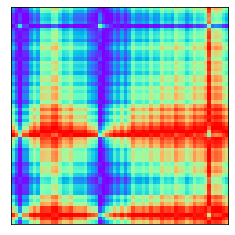

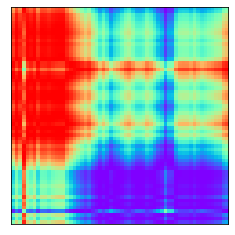

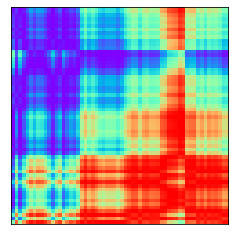

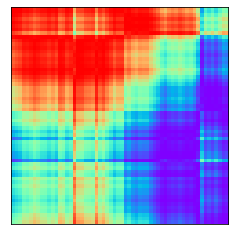

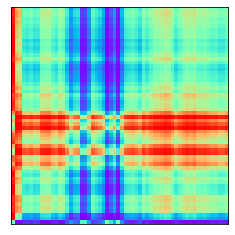

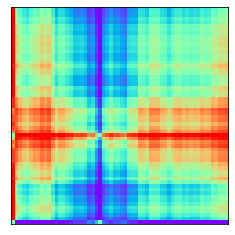

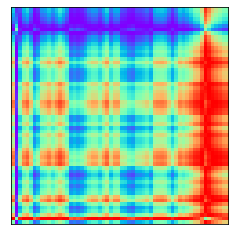

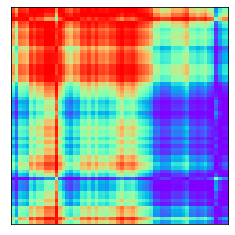

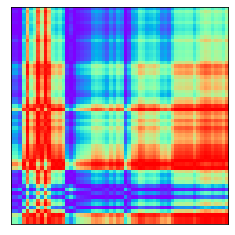

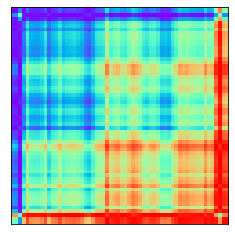

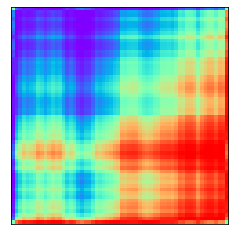

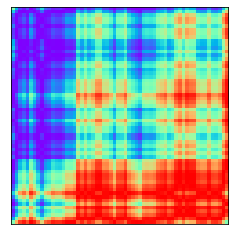

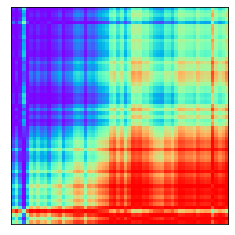

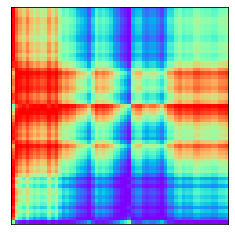

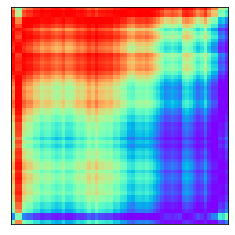

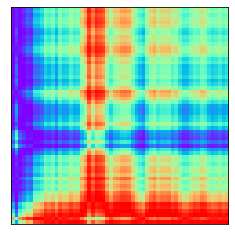

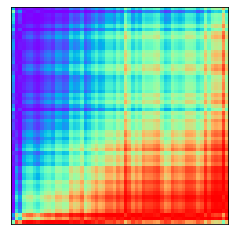

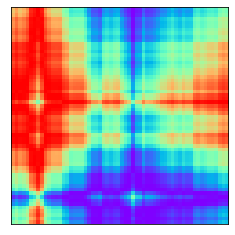

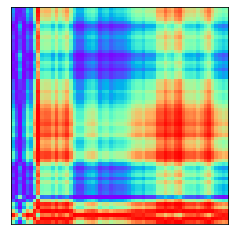

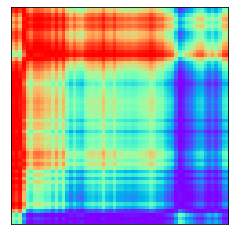

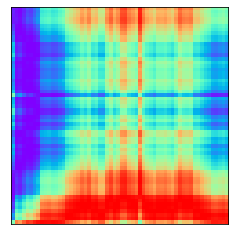

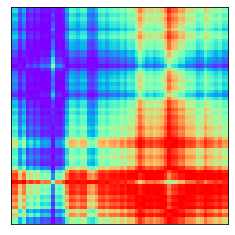

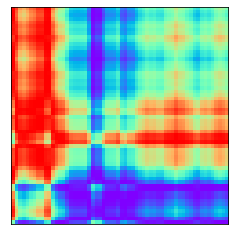

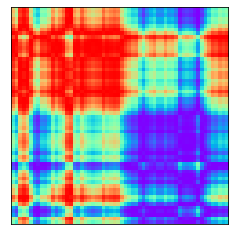

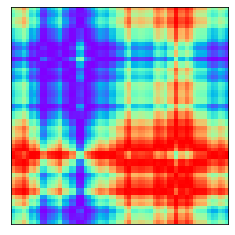

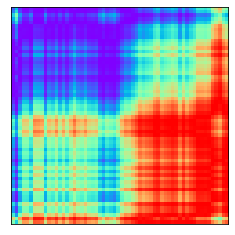

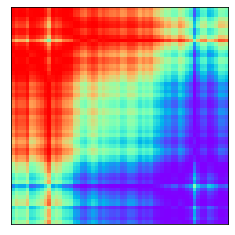

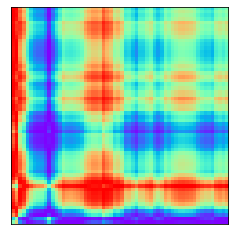

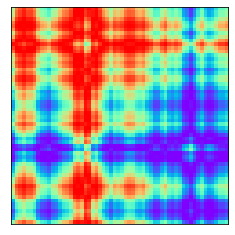

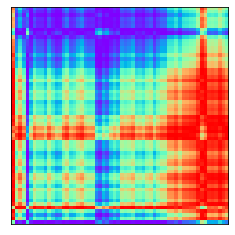

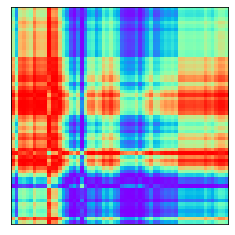

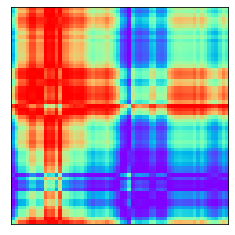

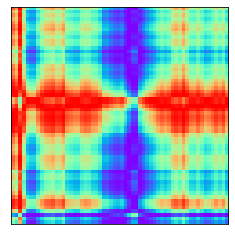

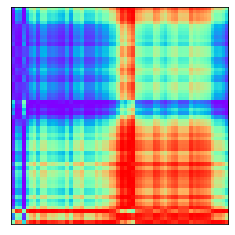

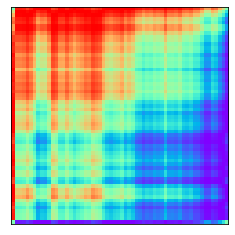

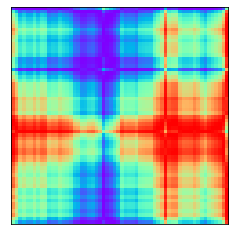

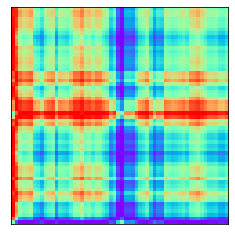

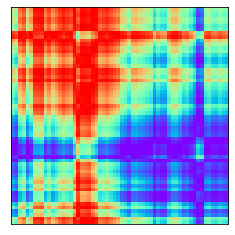

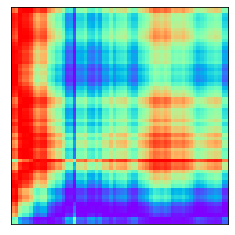

In [ ]:
img_path = '../data/imgs'
gramian_img(img_path,gramian_df)

In [ ]:
gramian_df.shape